<a href="https://colab.research.google.com/github/Sebastianx08/PROYECTO-FINAL/blob/main/Proyecto_final_equipo_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
import glob
import os
import numpy

In [ ]:
#Equipo 5: Sebastian Osorio Rodriguez-2082502
           #Marco Antonio Cisneros Morales-1980504
           #Luis Yael Salazar Mejia-2092397
           #Jorge Eduardo Garza Garza-1842081
#Inteligencia Artificial y Redes Neuronales PIA
#Entrenamiento de una red neuronal convulusional

In [3]:
!pip install kaggle
from google.colab import files

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sebastianx08","key":"3fe3452883ea69b0e99aafd53d081123"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d kshitij192/cars-image-dataset

 88% 32.0M/36.3M [00:00<00:00, 87.4MB/s]
100% 36.3M/36.3M [00:00<00:00, 82.9MB/s]


In [7]:
import zipfile

# Ruta al archivo ZIP descargado
zip_file_path = '/content/cars-image-dataset.zip'

# Ruta a la carpeta donde deseas descomprimir el archivo
extracted_folder_path = '/content/Dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

In [8]:
imagenes  = []
etiquetas = []

In [ ]:
 #Ruta de la carpeta principal
#carpeta_principal = '/content/Dataset/Cars Dataset/test'
carpeta_principal1= '/content/Dataset/Cars Dataset/train'
# Patrón para encontrar todas las subcarpetas dentro de la carpeta principal
patron = os.path.join(carpeta_principal1, '*')

# Utiliza glob para encontrar todas las subcarpetas que coinciden con el patrón
subcarpetas = glob.glob(patron)

# Itera sobre las subcarpetas encontradas
z = 0
for subcarpeta in subcarpetas:

    if os.path.isdir(subcarpeta):
        print('Subcarpeta:', subcarpeta)
        # Haz algo con la subcarpeta si es necesario

        for x in glob.iglob(f'{subcarpeta}/*.jpg'):
          print(x)
          test_image  = cv2.imread(x)
          #train_image = cv2.imread(x)
          # Formato de imagen
          img_resized = cv2.resize(test_image, (150,94), )

          # Guardar imagenes y etiquetas
          arreglo_imagen = np.array(img_resized)
          imagenes.append(arreglo_imagen)
          etiquetas.append(z)
    z += 1

In [10]:
from PIL import Image
import os
import glob

def obtener_resolucion_mas_pequena(carpeta_principal):
    # Patrón para encontrar todas las imágenes dentro de la carpeta principal
    patron_imagenes = os.path.join(carpeta_principal, '**', '*.jpg')

    # Utiliza glob para encontrar todas las imágenes que coinciden con el patrón
    imagenes = glob.glob(patron_imagenes, recursive=True)

    resolucion_mas_pequena = float('inf'), float('inf')  # Inicializar con valores grandes

    # Itera sobre las imágenes encontradas
    for imagen_path in imagenes:
        with Image.open(imagen_path) as img:
            # Obtiene la resolución de la imagen
            ancho, alto = img.size

            # Actualiza la resolución más pequeña
            resolucion_mas_pequena = (
                min(resolucion_mas_pequena[0], ancho),
                min(resolucion_mas_pequena[1], alto)
            )

    return resolucion_mas_pequena

# Ejemplo de uso
carpeta_principal = '/content/Dataset/Cars Dataset/train'
resolucion_minima = obtener_resolucion_mas_pequena(carpeta_principal)

# Imprime la resolución más pequeña
print(f'Resolución más pequeña: Ancho={resolucion_minima[0]}, Alto={resolucion_minima[1]}')


Resolución más pequeña: Ancho=150, Alto=94


In [11]:
etiquetas = np.array(etiquetas)

In [12]:

images = np.array(imagenes)

In [13]:

np.shape(images)

(3352, 94, 150, 3)

In [14]:
len(etiquetas)

3352

In [15]:

etiquetas[-1]

6

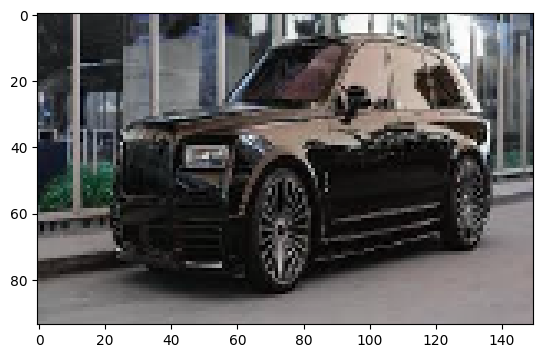

In [16]:

plt.imshow(imagenes[0])

In [17]:
# Convierte la imagen en un arreglo de numpy
arreglo_imagen = np.array(img_resized)
imagenes.append(arreglo_imagen)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, etiquetas, test_size=0.30,random_state=42)
X_train

In [19]:
X_train.shape

(2346, 94, 150, 3)

In [20]:
X_test.shape

(1006, 94, 150, 3)

In [21]:
y_train.shape

(2346,)

In [22]:
y_test.shape

(1006,)

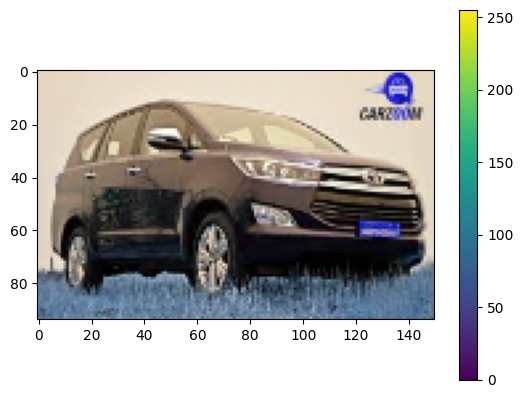

In [23]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [24]:
X_train = X_train / 255.0

X_test = X_test / 255.0

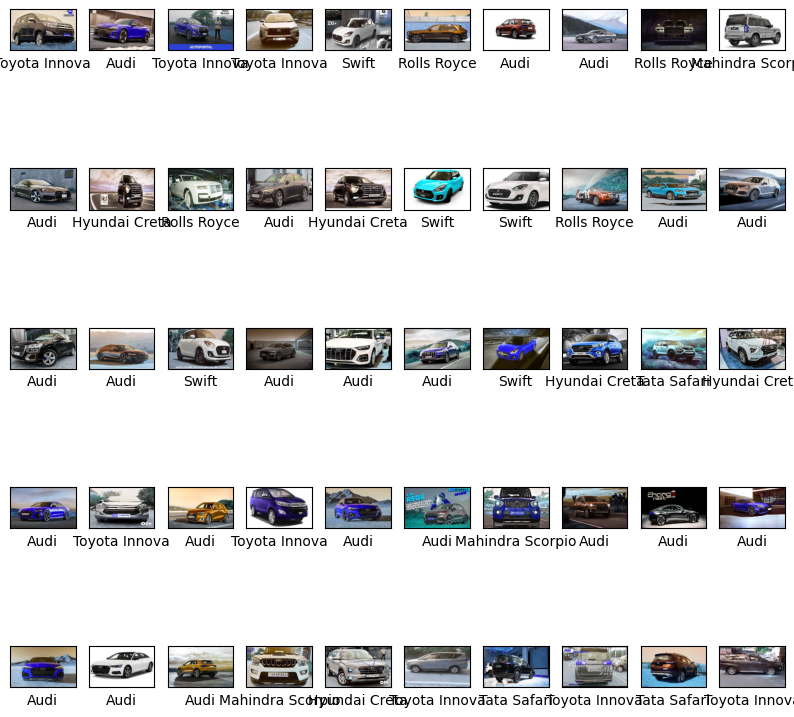

In [25]:
class_names = ['Rolls Royce','Hyundai Creta','Mahindra Scorpio','Toyota Innova','Swift','Tata Safari','Audi']
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [26]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(94, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 92, 148, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 46, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 34, 64)        36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [29]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(7))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 92, 148, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 46, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 34, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 43520)             0

In [ ]:
numpy.array(X_test)

In [32]:
numpy.array(y_test)

array([6, 3, 6, ..., 1, 6, 6])

In [ ]:
numpy.array(X_train)

In [34]:
numpy.array(y_train)

array([3, 6, 3, ..., 3, 2, 6])

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10
74/74 [==============================] - 62s 820ms/step - loss: 1.8317 - accuracy: 0.2813 - val_loss: 1.7685 - val_accuracy: 0.3658
Epoch 2/10
74/74 [==============================] - 59s 804ms/step - loss: 1.5085 - accuracy: 0.4676 - val_loss: 1.4445 - val_accuracy: 0.4712
Epoch 3/10
74/74 [==============================] - 60s 811ms/step - loss: 1.1469 - accuracy: 0.6121 - val_loss: 1.2788 - val_accuracy: 0.5537
Epoch 4/10
74/74 [==============================] - 64s 870ms/step - loss: 0.7970 - accuracy: 0.7315 - val_loss: 1.2703 - val_accuracy: 0.5875
Epoch 5/10
74/74 [==============================] - 60s 810ms/step - loss: 0.4687 - accuracy: 0.8529 - val_loss: 1.3181 - val_accuracy: 0.5815
Epoch 6/10
74/74 [==============================] - 60s 807ms/step - loss: 0.2499 - accuracy: 0.9237 - val_loss: 1.6568 - val_accuracy: 0.6133
Epoch 7/10
74/74 [==============================] - 60s 818ms/step - loss: 0.1177 - accuracy: 0.9685 - val_loss: 1.9819 - val_accuracy: 0.5974

32/32 - 9s - loss: 2.5966 - accuracy: 0.6372 - 9s/epoch - 268ms/step


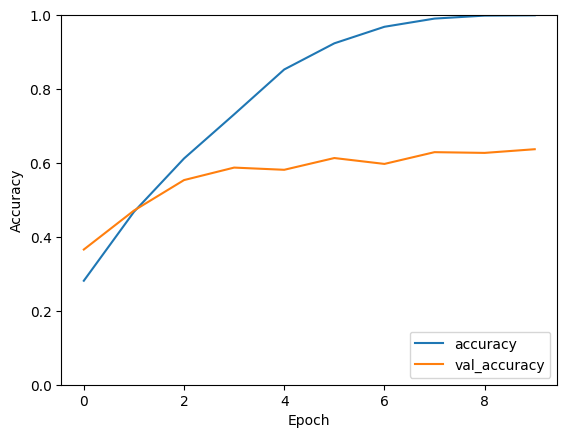

In [36]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [37]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [51]:
predictions = probability_model.predict(X_test)

32/32 [==============================] - 7s 207ms/step


In [52]:
predictions[0]

array([9.2695898e-01, 2.7716957e-10, 6.7601341e-08, 2.8860112e-11,
       5.1223026e-07, 2.7295865e-02, 4.5744374e-02], dtype=float32)

In [55]:
np.argmax(predictions[1])

3

In [56]:
y_test[1]

3

In [57]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(7))
  plt.yticks([])
  thisplot = plt.bar(range(7), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

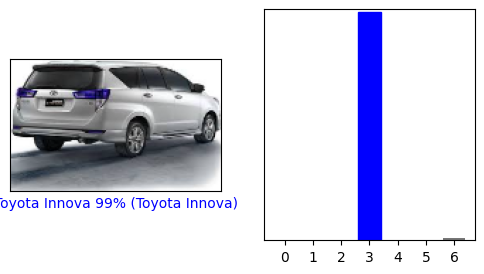

In [58]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

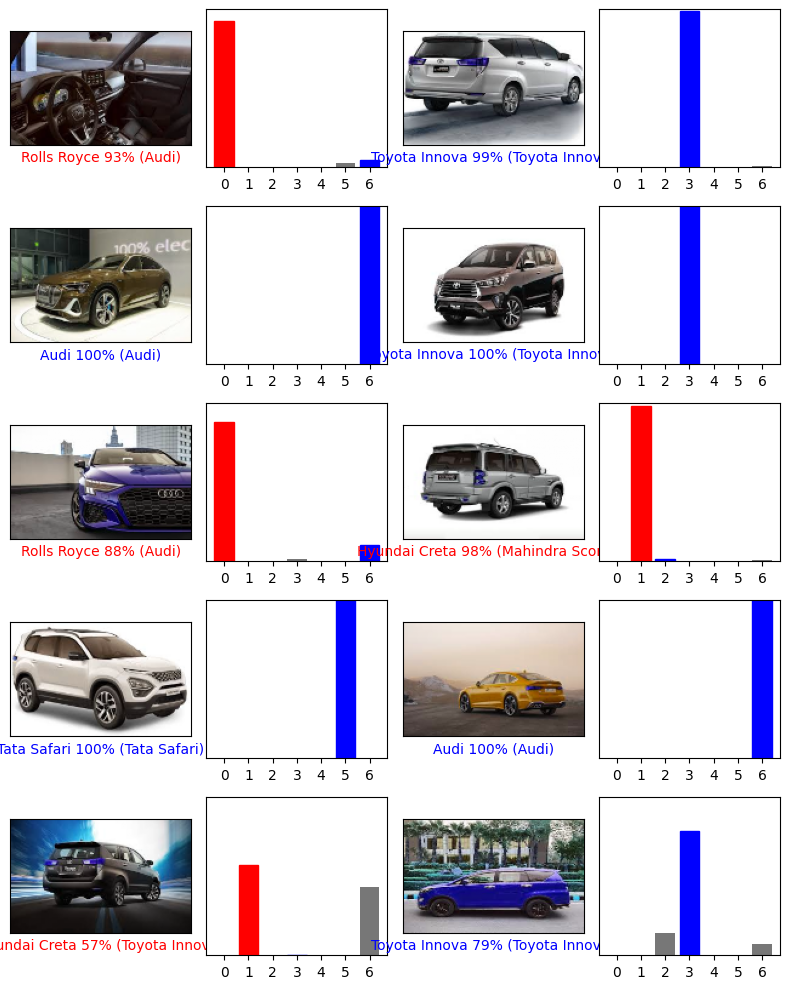

In [59]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()